<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_132_Reference_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 132: ARIMA VI - Seasonal ARIMA

---

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|ARIMA VI - Seasonal ARIMA|
|||
|**Class Description**|In this class, a student will learn how to add seasonality to an ARIMA model|
|||
|**Class**|C132|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Understand Seasonality|
||Understand Seasonal ARIMA (SARIMA)|
||Estimate SARIMA hyperparameter values|
||Perform Grid search for SARIMA|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

#### Teacher-Student Activities

From the past few lessons, we had deployed many time series data and mastered the art of ARIMA models. Now, it's time to add one last component to the model: **Seasonality**.

Uptil now, we haven't considered the effect of seasonality in time series. However, this behaviour is surely present in many cases, such as increase in gift shop sales during Christmas or high volume hiring of sales staff in malls during holiday season.


In today's class, we will learn about **Seasonal ARIMA (SARIMA)** by setting a forecasting model for the same Air passenger dataset used in the previous lesson.

Let us first recall the concepts covered in the previous lesson and start this lesson from **Activity 1: Understanding Seasonal Time Series**.

---

#### Recap

#### Picking Parameters for ARIMA (p,d,q)

We already know how many times we had to difference the dataset, so here the value of hyperparameter `d` is `1`.

Next, we need to figure out the values of `p` and `q`.

Remember the following rule: <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2ed779bb-99bf-4856-9770-ff63fd5913f1.png" width = 25 width = 20/>

- To estimate order `p`, PACF plot is used.
- To estimate order `q`, ACF plot is used.




**Determining order `q`:**

Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms i.e value of order `q`.



Estimating `p` and `q` values using ACF and PACF plots can be very tricky. Let us look at some case studies of stationary datasets and try to estimate these values for them.

---
**Case 1:**

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ba55c4c9-a259-41f9-b609-3a317671eb99.png"/>

`Fig 4.1: ACF and PACF plots of case 1`
</center>

Here,
- PACF drops sharply after lag 1. Hence `p = 1`.
- ACF shows a gradually decreasing trend.

Note that whenever ACF or PACF plots show gradual decreasing trend, then the order value inferenced from that plot would be `0`.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2ed779bb-99bf-4856-9770-ff63fd5913f1.png" width = 25 width = 20/> In other words,
- If PACF data points are sinusoidal* or declining gradually, then `p = 0`.

- If ACF data points are sinusoidal or declining gradually, then `q = 0`.

In the above case study, ACF plot is gradually declining, hence `q = 0`.  

**Conclusion:** `p = 1` and `q = 0` for case 1.

***Note:** A sinusoidal ACF or PACF plot may look like this:
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ed997e7f-7401-4b85-a1bf-4a47ba0f058a.PNG"/>

<br/>

---
<br/>

**Case 2:**

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/1c48db1d-f740-4f2a-9b56-c2c887ff7bd9.png"/>

`Fig 4.2: ACF and PACF plots of case 2`
</center>

Here,
- PACF shows a gradual decreasing trend. Hence `p = 0`.
- ACF drops sharply after lag 1. Hence, `q = 1`.

**Conclusion:** `p = 0` and `q = 1` for case 2.

<br/>

---
<br/>

**Case 3:**

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f1ec52f7-4f89-4358-b467-44adb9716eb7.png"/>

`Fig 4.3: ACF and PACF plots of case 3`
</center>

Here,
- PACF shows a gradual decreasing trend. Also, it drops sharply after lag 1. Hence `p = 0` or `p = 1`. You can experiment with both the values.

- ACF drops sharply after lag 2. Hence, `q = 2`.

**Conclusion:** `p = 0` or `p = 1`, and `q = 2` for case 3.



---

#### Deploying ARIMA


Finding out parameters for the ARIMA Time-Series forecasting model.

**Dataset Credits:** https://www.kaggle.com/rakannimer/air-passengers

**Link to the dataset:** https://s3-whjr-curriculum-uploads.whjr.online/14b9487d-e1f7-4a83-be06-2da854d82783.csv





In [ ]:
# Load the dataset and print first 5 rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

airpass_df = pd.read_csv("https://s3-whjr-curriculum-uploads.whjr.online/14b9487d-e1f7-4a83-be06-2da854d82783.csv")
airpass_df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
airpass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# Convert the data type of 'Month' column to datetime.
airpass_df['Month'] = pd.to_datetime(airpass_df['Month'], infer_datetime_format=True)
airpass_df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
# Confirm the data type of 'Month' column.
airpass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
# Use 'Month' column as an index
airpass_in_df = airpass_df.set_index('Month')
airpass_in_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


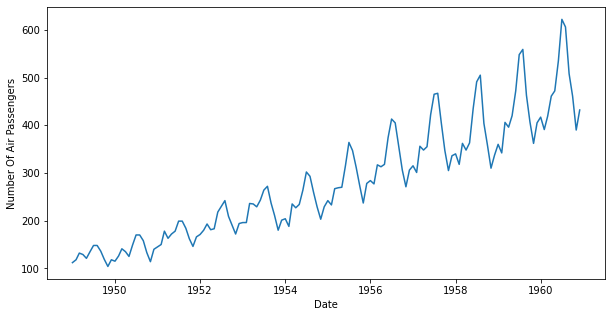

In [ ]:
# Visualise time-series plot.
plt.figure(figsize = (10, 5))
plt.xlabel('Date')
plt.ylabel('Number Of Air Passengers')
plt.plot(airpass_in_df)
plt.show()

In [ ]:
# Implement ADF test.
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
adf_df1 = adfuller(airpass_in_df['#Passengers'])
print('ADF Statistic:', adf_df1[0])
print('p-value: ', adf_df1[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey Fuller Test:
ADF Statistic: 0.8153688792060418
p-value:  0.9918802434376409


In [ ]:
# Use 'diff(1)' function to perform first-order differencing
airpass_diff1 = airpass_in_df.diff(1)
airpass_diff1

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [ ]:
# Remove NaN values and check stationarity of the time series data
airpass_diff1.dropna(inplace = True)
adf_df2 = adfuller(airpass_diff1['#Passengers'])
print('ADF Statistic:', adf_df2[0])
print('p-value: ', adf_df2[1])

ADF Statistic: -2.829266824169997
p-value:  0.05421329028382577


In [ ]:
# Use 'diff(1)' function to perform second-order differencing on differenced DataFrame.
airpass_diff2 = airpass_diff1.diff(1)
airpass_diff2

,#Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [ ]:
# Remove NaN values and check stationarity of the time series data
airpass_diff2.dropna(inplace = True)
adf_df3 = adfuller(airpass_diff2['#Passengers'])
print('ADF Statistic:', adf_df3[0])
print('p-value: ', adf_df3[1])

ADF Statistic: -16.384231542468513
p-value:  2.7328918500142026e-29


---

#### Accuracy Metrics for Time Series Forecast

The two widely used accuracy metrics other than RMSE and MAE  for judging forecast performance are:
1. Mean Absolute Percentage Error (MAPE)
2. Akaike Information Criterion (AIC)

**1. Mean Absolute Percentage Error (MAPE)**

- MAPE is used to estimate the accuracy in terms of the differences in the actual v/s predicted values.
- MAPE is calculated as:

\begin{align}
\text{MAPE} & = \frac{1}{n}\sum^{n}_{t=1} \bigg | \frac{A_t - F_t}{A_t} \bigg |
\end{align}

Where,
 - $n$ is the number of observations.
 - $A_t$ is the actual value at time $\text{t}$.
 - $F_t$ is the forecast/predicted value at time $\text{t}$.

MAPE is usually expressed in terms of percentage. Lower the MAPE, better fit is the model.

Let us create a user-defined function to calculate MAPE using the Python `numpy` module. We will use this function later in the upcoming activity to calculate MAPE value for Air passenger dataset.




In [ ]:
# Define a function to calculate MAPE.
def calculate_mape(y_actual, y_predicted):
  mape = np.mean(np.abs((y_actual - y_predicted)/y_actual)) * 100
  return mape

**2. Akaike Information Criterion (AIC)**

- AIC is a single number score that is used to determine which model is the best model out of  multiple models for a given dataset.
- AIC scores are only useful in comparison with other AIC scores for the same dataset.
- AIC measures the information loss, so the **model with a lower AIC score indicates a better fit**.
- It is calculated using the formula:

\begin{align}
\text{AIC} & = n \times \text{log(MSE)} + 2k
\end{align}

Where,
 - $n$: Number of observations.
 - $\text{log(MSE)}$: Log of Mean Squared Error.
 - $k$: Number of features. In our case, there is only 1 feature i.e `#Passengers`. Thus, `k = 1`.

A handy way to calculate AIC score for a model is to use `aic` attribute of `ARIMA` object. We will use this attribute in the upcoming section.

Let us now estimate hyperparameter values for ARIMA and also explore an alternative approach that can be used for estimating these values.

---

#### Estimating Hyperparameter Values of ARIMA

Here, we will estimate the values of order p and q:

1. To estimate order `p`, Partial Autocorrelation Function (PACF) plot is used.
2. To estimate order `q`, Autocorrelation Function (ACF) plot is used.


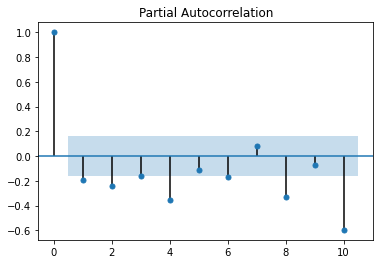

In [ ]:
# Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(airpass_diff2, lags = 10)
plt.show()

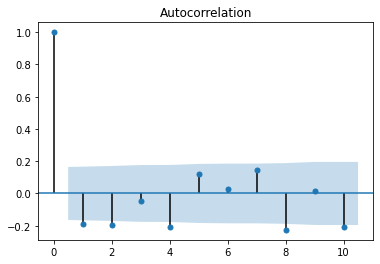

In [ ]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airpass_diff2, lags = 10)
plt.show()


An alternative approach to finding optimal hyperparameter values without using ACF and PACF plots is to automate the process of training and evaluating ARIMA models on different combinations of model hyperparameters. In machine learning this is called a **grid search** or **model tuning**.

<br/>

**Grid Searching Method:**

In this technique, we will simply iterate through a grid of `p`, `d`, and `q` ARIMA parameters and evaluate model performance for each set of parameters using AIC values.

Let us first define a grid of three variables `p`, `d`, and `q`, where `p` and `q` ranges from `0` to `4` and `d` ranges from `0` to `2`.



In [ ]:
# Initiate 'p', 'd' and 'q' parameter grid.
p = range(0, 5)
q = range(0, 5)
d = range(0, 3)

Now we need multiple combinations of `(p, d, q)` values like: `(0, 0, 0)`, `(0, 0, 1)`, `(0, 0, 2)` $\dots$ `,(4, 2, 3)`, `(4, 2, 4)`

This looks like the Cartesian product of `p`, `d`, and `q` variables.

To obtain such combination of values, use `product()` function of `itertools` module which finds the cartesian product from the given iterator.

**Note:** Python **`itertools`** is a library in Python which consists of multiple methods that are used in various iterators to compute a fast and code efficient solution.

In [ ]:
# Create combinations of 'p', 'd' and 'q' values.
import itertools
pdq_combination = list(itertools.product(p, d, q)) # return the list of all the computed tuple
print(pdq_combination)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]


Now that we have obtained all possible combinations of `p`, `d`, and `q` parameter values, let us build ARIMA model for each set of parameter values and determine the AIC score of each model. Also, check which set of parameter values returns the lowest AIC score.

Follow the steps given below to perform grid search hyperparameter tuning for ARIMA:

1. Import `ARIMA` class from `statsmodels.tsa.arima_model` module.

2. Initialise two variables `lowest_aic` and `best_params` to `float("inf")` and `None` respectively. The `float("inf")` will set the variable with an infinitely large value. Here,
  - The `lowest_aic` variable will store the lowest AIC score obtained out of all AIC scores.
  - The `best_params` variable will store the `(p, d, q)` values for which the model AIC score is the lowest.

3. Initiate a `for` loop that iterates through every combination of `(p, d, q)` values stored in `pdq_combination` variable. Inside this `for` loop,
 - Add a `try` block and `except` block to catch and handle some errors/exceptions that might result from different hyperparameter values. We need not study in detail the use of these error handling blocks.

 - Inside the `try` block, create an object of `ARIMA` class and pass the following inputs:
    - `airpass_in_df`:  The original indexed DataFrame. You can also perform train-test split and train the model using train set.
    - `order = pdq`: Each combination of hyperparameter values from `pdq_combination`.

 - Call the `fit()` function using the object of `ARIMA`.

 - Determine the AIC score of the current model using `aic` attribute of `ARIMA` object and store this value in a variable `aic_m`. Print the  hyperparameter values and the AIC score of the current instance model.

 - Compare `aic_m` and `lowest_aic` values.
    - If  `aic_m < lowest_aic`, then store current AIC i.e `aic_m` value in `lowest_aic` variable and current order i.e `pdq` value in `best_params` variable.
  
  In this way, for every iteration, an ARIMA model is created for a set of hyperparameter values and then the AIC score for that model is determined. If that AIC score is less than the last lowest AIC score, then replace the lowest AIC score with the current AIC score.

4. Finally, print the best hyperparameter values exhibiting lowest AIC score by printing `best_params` and `lowest_aic` variables.



**Note:** This execution will generate a lot of unnecessary warnings. To remove these warnings, add the following code to the below code cell.

```python
import warnings
warnings.filterwarnings("ignore")
```

In [ ]:
# Perform Grid Search Hyperparameter tuning for ARIMA
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA

lowest_aic, best_params = float("inf"), None

for pdq in pdq_combination:
  try:
    model = ARIMA(airpass_in_df, order = pdq).fit()
    aic_m = model.aic

    print(f'ARIMA{pdq} AIC={aic_m:.3f}')
    if aic_m < lowest_aic:
      lowest_aic, best_params = aic_m, pdq

  except:
    continue

print(f'Best ARIMA {best_params} AIC={lowest_aic:.3f}')

ARIMA(0, 0, 0) AIC=1790.368
ARIMA(0, 0, 1) AIC=1618.863
ARIMA(0, 1, 0) AIC=1415.278
ARIMA(0, 1, 1) AIC=1398.827
ARIMA(0, 1, 2) AIC=1398.386
ARIMA(0, 1, 3) AIC=1381.664
ARIMA(0, 1, 4) AIC=1357.315
ARIMA(0, 2, 0) AIC=1452.590
ARIMA(0, 2, 1) AIC=1413.363
ARIMA(0, 2, 2) AIC=1396.372
ARIMA(0, 2, 3) AIC=1396.408
ARIMA(1, 0, 0) AIC=1428.179
ARIMA(1, 0, 1) AIC=1409.748
ARIMA(1, 0, 2) AIC=1411.050
ARIMA(1, 0, 3) AIC=1420.734
ARIMA(1, 0, 4) AIC=2360.428
ARIMA(1, 1, 0) AIC=1403.473
ARIMA(1, 1, 1) AIC=1402.145
ARIMA(1, 1, 2) AIC=1371.815
ARIMA(1, 1, 3) AIC=1373.076
ARIMA(1, 1, 4) AIC=1359.167
ARIMA(1, 2, 0) AIC=1449.026
ARIMA(1, 2, 2) AIC=1393.908
ARIMA(1, 2, 3) AIC=1394.467
ARIMA(1, 2, 4) AIC=1396.217
ARIMA(2, 0, 0) AIC=1413.639
ARIMA(2, 0, 1) AIC=1408.249
ARIMA(2, 0, 2) AIC=1464.437
ARIMA(2, 0, 3) AIC=1430.704
ARIMA(2, 0, 4) AIC=2587.983
ARIMA(2, 1, 0) AIC=1397.975
ARIMA(2, 1, 1) AIC=1361.696
ARIMA(2, 1, 2) AIC=1344.043
ARIMA(2, 1, 3) AIC=1343.278
ARIMA(2, 1, 4) AIC=1338.585
ARIMA(2, 2, 0) AIC=1

In [ ]:
# Build ARIMA model with optimal order values for entire dataset.
arima_1 = ARIMA(airpass_in_df, order = (4, 1, 4)).fit()
arima_1.aic

1332.9549969619318

MAE: 18.246955384784968
RMSE: 23.282991464973207
MAPE: 6.762105744000019


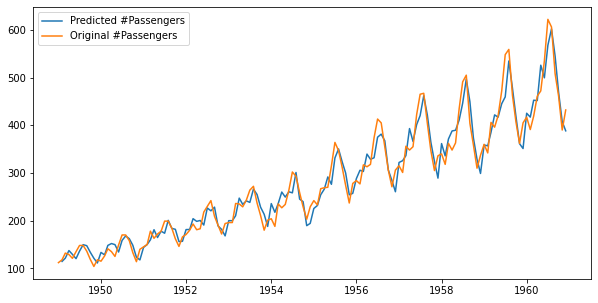

In [ ]:
# Perform prediction using 'predict()' function for original dataset.

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict using `predict()` function with start = 1 and end = (total observations - 1)
pred = arima_1.predict(1, len(airpass_in_df) - 1, typ = 'levels' )

# Print MAE, RMSE, MAPE values
print("MAE:", mean_absolute_error(airpass_in_df[1:], pred))
print("RMSE:", np.sqrt(mean_squared_error(airpass_in_df[1:], pred)))

print("MAPE:", calculate_mape(airpass_in_df['#Passengers'].iloc[1:], pred))

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred, label = 'Predicted #Passengers')
plt.plot(airpass_in_df['#Passengers'], label = 'Original #Passengers')
plt.legend()
plt.show()


**Forecasting Future:**

Let us forecast future values using this ARIMA model by applying `predict()` function.

We have 144 (existing data of 12 yrs in months) data points. Now, we want to forecast for additional 10 yrs (i.e $10 \times 12 \text{ months} = 120$ data points).

Thus, the start index for `predict()` function would be $144$ and end index would be $144 + 120 = 264$ records/data points.

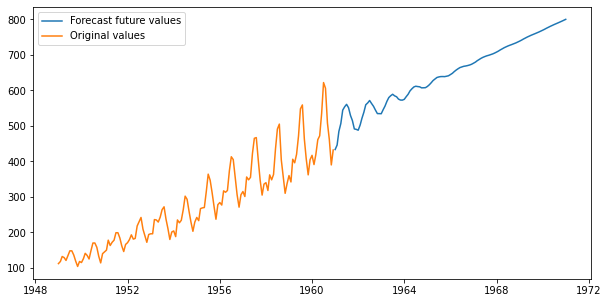

In [ ]:
# Perform prediction for new values. Plot the forecast values
arima_forecast = arima_1.predict(start = 144, end = 264, typ = 'levels')
plt.figure(figsize=(10, 5))
plt.plot(arima_forecast, label = 'Forecast future values')
plt.plot(airpass_in_df['#Passengers'], label = 'Original values')
plt.legend()
plt.show()

From the above plot we can conclude that this ARIMA model is able to capture the upward trend but is not able to capture the **Seasonality** of the time series data.

To incorporate the effect of seasonality in time series, we will use another time series forecasting model called as **Seasonal ARIMA** or **SARIMA**.



---

#### Activity 1: Understanding Seasonal Time Series

In one of the previous classes, we had explored  Seasonality and Seasonal Differencing. Let us recall that.

**Seasonality:**
- Seasonality is used to find the variations which occur at regular intervals of time.
- A seasonal time series has patterns that repeat at regular intervals, for example high sales at every weekend as shown in image below:
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ff3ed7e4-1264-4143-8a74-73ebd4a5dc7a.PNG"/>

  `An example of a seasonal time series` </center>

- This is a repeating pattern within a fixed period.


**Seasonal Differencing:**

A seasonal difference is the difference between an observation and the previous observation from the same season. It can be written as:

$$y'_t = y_t - y_{t-m}$$

Where $m$ is the number of seasons. These are also called **lag-$m$ differences**, as we subtract the observation after a lag of $m$ periods.

Thus, if $m=12$, the differences are taken between original observations that are a year apart from each
other (for example, lag value for Jan 1990 will be obtained by subtracting its value from Jan 1989).

You can perform seasonal differencing using `diff(m)` function of pandas DataFrame where `m` is seasonal period. Let us perform seasonal differencing for the first-order differenced dataset using `diff(12)` function.

In [ ]:
# S1.1: Perform seasonal differencing for first-order differenced dataset.
seasonal_diff = airpass_diff1.diff(12)
seasonal_diff.head(20)

,#Passengers
Month,
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN
1949-10-01,NaN


You may observe that the seasonal differencing returned null values in its first 12 elements. The lag value at `1950-02-01` will be obtained by subtracting the original sales value of `1949-02-01`	 from `1950-02-01`. Let us now understand the concept of Seasonal ARIMA.

---

#### Understanding Seasonal ARIMA

A seasonal ARIMA or SARIMA models are ARIMA models with a seasonal component. It allows for the occurrence of seasonality in a series.

The seasonal ARIMA model combines both non-seasonal and seasonal components. A SARIMA model with both non-seasonal and seasonal orders is as follows:

$$\text{SARIMA} \underbrace{(p, d, q)}_\text{non-seasonal} \underbrace{(P, D, Q)m}_\text{seasonal}$$

Here,
- $p$, $d$ and $q$ are non-seasonal ARIMA orders.
- $m$ is the number of observations per year.

- $P$ is the Seasonal Autoregressive (AR) order.
- $D$  is the Seasonal Differencing order.

- $Q$ is the Seasonal Moving Average (MA) order.

The seasonal part of the model contains terms that are like non-seasonal components of the model but that involve lagged values of the $m$ periods.

Let us compare a simple ARIMA and SARIMA model:

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/58f8ee7b-5369-44d5-9c31-a5d7bf9c27c1.png"/>



The above simple SARIMA model has season length of 4 months. This SARIMA model only has a seasonal part as we have set the non-seasonal orders to zero.

A SARIMA model with both non-seasonal and non-seasonal orders is as follows:

**SARIMA(1, 0, 1)(1, 0, 1)4 model:**

$y_t = \phi_0 + \phi_1 y_{t-1}  + \theta_1 \epsilon_{t-1}+ \phi_4 y_{t-4}  + \theta_4 \epsilon_{t-4} + \epsilon_t$

In the previous class - **Lesson 131: ARIMA V - Grid Search ARIMA**, we learned how to identify non-seasonal orders $p$, $d$ and $q$. To determine the parameter values for seasonal orders $P$, $D$, $Q$ and $m$, we will again use the ACF and PACF plots. Let us learn how to estimate these values.


**Note:** Choosing values for each hyperparameter using ACF/PACF plots is not a precise exercise, these are rules of thumb and not an exact science for picking the value of each hyperparameter.






---

#### Activity 2: Picking Seasonal Hyperparameters

**Estimating seasonal period $m$:**

The order $m$ is the number of observations per year. For example,
  - If $m = 4$, it indicates that the data is being studied quarterly.
  - If $m = 12$, it indicates that the data is being studied monthly.

For Air passenger dataset, we had already noticed that there are 12 observations per year, single observation for each month. Hence, $m$ would be `12` in our case.

A way to identify $m$  is by creating ACF plot for original dataset. Here, $m$ is equal to the lag greater than $\text{lag 1}$ having greatest autocorrelation coefficient.

Let us visualise ACF plot up to lag 20 for original Air passenger dataset.




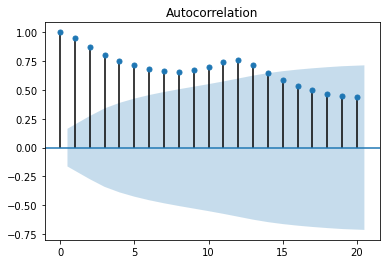

In [ ]:
# S2.1: Plot ACF for indexed DataFrame for identifying m
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(airpass_in_df, lags = 20)
plt.show()

To find seasonal period $m$, we look for a lag greater than $\text{lag 1}$ which is a peak in an ACF plot. Here, there is a peak at $\text{lag 12}$, indicating that the seasonal component repeats every 12 time steps. Thus, $m = 12$ in our case.

Next, we need to identify whether the value of seasonal differencing $D$.

**Estimating seasonal differencing order $D$:**

In the previous class, we had already estimated the value of non-seasonal differencing $d$ as 1 (using grid search). Next step is to identify whether there is a need of seasonal differencing or not.

Remember the following rule: <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2ed779bb-99bf-4856-9770-ff63fd5913f1.png" width = 25 width = 20/>
- $D=1$ if the series has a strong and stable seasonal pattern over time.
- $D=0$ if the series has an unstable seasonal pattern over time.

Let us understand these rules using few examples:

---

**Example 1:** Consider the following time-series plot:

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/151cbdff-ea27-40f5-b104-7b3b650e2517.png"/>

Here, the seasonal pattern does not seem stable over time. Hence, in this case, $D = 0$.

---

**Example 2:** Consider the following time-series plot:

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/960592ba-5286-44bc-9a3c-1cd99c64cc63.png"/>

Here, the seasonal pattern is very clear and seems stable over time. Hence, in this case, $D = 1$.

---

For our time-series data, the original plot looks like this:

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/588f36a9-f3ca-43c4-b506-1ea209e771a8.png"/>

By simply looking at the plot, we can say that there is a clear upward trend and stable seasonal pattern in the data. However, it is always better to first remove the trend and then identify whether the seasonal pattern is stable or not.

We had already removed the trend by performing first-order differencing. Let us now plot the first-order differenced data and identify whether it has stable and strong seasonal pattern or not.



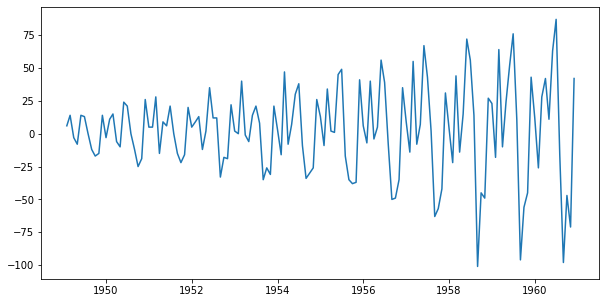

In [ ]:
# S2.2: Plot first-order differenced data and identify order 'D'
plt.figure(figsize = (10, 5))
plt.plot(airpass_diff1['#Passengers'])
plt.show()

You may observe that the seasonal pattern seems stable over time. Hence, we would perform seasonal differencing and the value of hyperparameter $D$ is `1`.

We had already performed seasonal differencing in **Activity 1: Understanding Seasonal Time Series**. Let us perform ADF test to confirm whether the seasonal differenced data is stationary or not.

In [ ]:
# S2.3: Remove NaN values and check stationarity of seasonal differenced data.
seasonal_diff.dropna(inplace = True)
adf_df3 = adfuller(seasonal_diff['#Passengers'])
print('ADF Statistic:', adf_df3[0])
print('p-value: ', adf_df3[1])

ADF Statistic: -15.595618083746338
p-value:  1.856511600123444e-28


You may observe that we obtained a very less p-value and a large negative ADF statistic value, thereby confirming that the seasonal differenced data is indeed stationary.

**Rule of thumb:** The value of $D$ usually never exceeds `1` and $d+D≤2$.

<br/>

Now, the next task is to identify the values of remaining two hyperparameters $P$ and $Q$.



Recall that, to find the non-seasonal orders $p$ and $q$, we plot the PACF and the ACF of the *differenced time series* if $d \gt 0$.

Now, to find the seasonal orders $P$ and $Q$, we plot the PACF and ACF of the differenced time series at multiple seasonal steps. Then we can use the same ACF and PACF rules to determine the seasonal orders. Let us understand how.

**Estimating seasonal AR order  $P$:**

Let us create a PACF plot for first-order differenced time-series, but this time we set the `lags` parameter to a list of lags instead of a maximum lag value. In our case, the list of lags will contain multiples of $12$ as $m = 12$. This plots the PACF at these specific lags only.

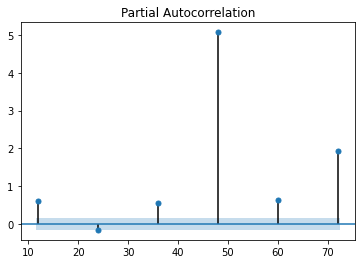

In [ ]:
# T1.1: Plot PACF for first-order differenced data at lags 12, 24, 36, 48, 60, 72
plot_pacf(airpass_diff1, lags = [12, 24, 36, 48, 60, 72])
plt.show()

Here, you can observe that we obtained a significant lag at $12$.

Hence $P = 1$, as lag 12 is the **first** seasonal lag of this time series data $\left(\frac{\text{lag}}{m} = \frac{12}{12}= 1 \right)$.

If there was no significant lag at $\text{lag } 12$, but instead there was a significant lag at $24$ as shown below:

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/8e2b6e76-5bf5-4a23-9eb1-ff09040e8256.png"/>

In such case, $P = 2$, as lag 24 is the **second** seasonal lag of this time series data $\left(\frac{\text{lag}}{m} = \frac{24}{12}= 2 \right)$.

Similarly, if there was no significant lag at lag 12 and 24, but instead there was a significant lag at $36$, then $P = 3$.


Likewise, let us estimate the value of seasonal order $Q$.

**Estimating seasonal MA order  $Q$:**

Create an ACF plot for first-order differenced time-series and  set the `lags` parameter to a list of lags instead of a maximum lag value. This plots the ACF at these specific lags only.

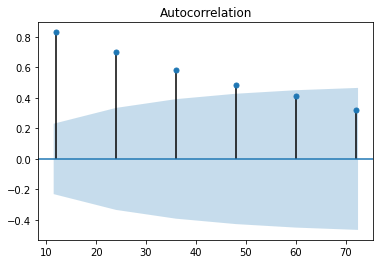

In [ ]:
# S2.4: Plot ACF for first-order differenced data at lags 12, 24, 36, 48, 60, 72
plot_acf(airpass_diff1, lags = [12, 24, 36, 48, 60, 72])
plt.show()

Here, you can observe that there is significant lag at $\text{lag 12}$. Hence, the value of order $Q$ can be `1`. However,  the ACF also shows a gradual decrease  and not a sharp decrease at seasonal lags. In such cases, the order $Q$ will be `0`. This is same as the rules used in identifying non-seasonal orders `p` and `q`. Let us recall those rules.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2ed779bb-99bf-4856-9770-ff63fd5913f1.png" width = 25 width = 20/> Rules for orders `p` and `q`.
- If PACF data points are sinusoidal or declining gradually, then `p = 0`.

- If ACF data points are sinusoidal or declining gradually, then `q = 0`.

Hence, our probable SARIMA model equation can be:


$$\text{SARIMA(4, 1, 4)(1, 1, 0)12}$$

**Note:** We are using non-seasonal order values of ARIMA obtained from grid search in the previous lesson. You can use other values of these orders as per your choice.

Let us now deploy this model using `statsmodels ` module.




---

#### Activity 3: Deploying SARIMA

SARIMA model can be implemented using **`SARIMAX`** class of `statsmodels.tsa.statespace.sarimax` module. The implementation is called SARIMAX instead of SARIMA because the **"X"** means that the implementation also supports exogenous variables.

**What are exogenous variables?**

An exogenous variable is one whose value is determined outside the model and is imposed on the model. In other words, variables that affect a model without being affected by it. These may be the predictors of other models.

**Note:** As of now, we are not using predictors of other models in this SARIMA model. Hence, ignore the concept of exogenous variables for now.

Now let us create a SARIMAX model for the entire dataset and perform using the steps given below:

1. Import `SARIMAX` class from `statsmodels.tsa.statespace.sarimax` module.

2. Create an object of `SARIMA` class and pass the following inputs:
  - `airpass_in_df`:  The original indexed DataFrame.
  - `order = (4, 1, 4)`: The non-seasonal ARIMA orders (`p`, `d`, `q`).
  - `seasonal_order = (1, 1, 0, 12)`: The seasonal ARIMA orders (`P`, `D`, `Q`, `m`).

3. Call the `fit()` function using the object of `SARIMAX`.

4. Print the AIC score using `aic` attribute.


In [ ]:
# T3.1: Deploy SARIMA model.
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(airpass_in_df, order = (4, 1, 4), seasonal_order = (1, 1, 0, 12)).fit()
print(sarima_model.aic)

1018.2995723514282


Let us now perform prediction using `predict()` function by specifying the start and end index for differenced dataset. Also, plot the predictions.

**Note:** In case of SARIMAX, using `typ = 'levels'` attribute within `predict()` function is not mandatory as the `SARIMAX` class implicitly performs prediction for differenced data (if any).

Evaluate this model using accuracy metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). Also calculate the Mean Absolute Percentage Error (MAPE) value by calling `calculate_mape()` function (This function was already defined in the previous class).

MAE: 8.85391485295005
RMSE: 11.945696621987313
MAPE: 3.7314732020891044


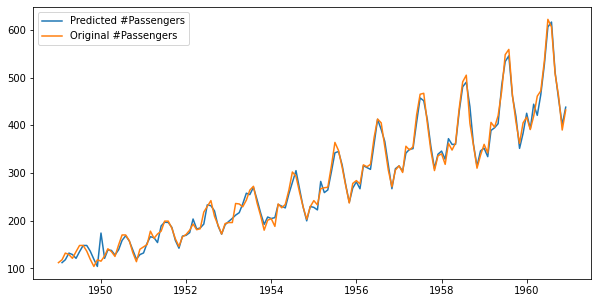

In [ ]:
# S3.1: Perform prediction using 'predict()' function for original dataset.

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict using `predict()` function with start = 1 and end = (total observations - 1)
pred = sarima_model.predict(1, len(airpass_in_df) - 1)

# Print MAE, RMSE, MAPE values
print("MAE:", mean_absolute_error(airpass_in_df[1:], pred))
print("RMSE:", np.sqrt(mean_squared_error(airpass_in_df[1:], pred)))

print("MAPE:", calculate_mape(airpass_in_df['#Passengers'].iloc[1:], pred))

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred, label = 'Predicted #Passengers')
plt.plot(airpass_in_df['#Passengers'], label = 'Original #Passengers')
plt.legend()
plt.show()

From above plot, we can see that our predicted forecasts are very close to the real time series values. The MAE, RMSE and MAPE values are very good as compared to that obtained with non-seasonal ARIMA.

**Forecasting Future:**

Let us forecast future values using this SARIMA model by applying `predict()` function.

We have 144 (existing data of 12 years in months) data points. Now, we want to forecast for additional 10 years (i.e $10 \times 12 \text{ months} = 120$ data points).

Thus, the start index for `predict()` function would be $144$ and end index would be $144 + 120 = 264$ records/data points.

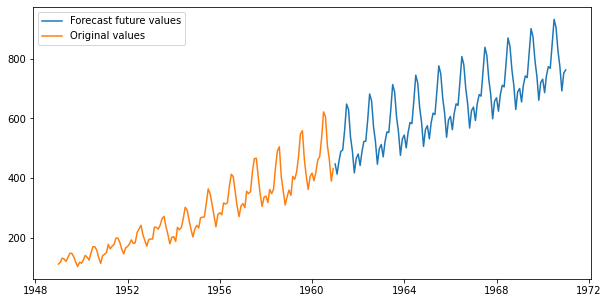

In [ ]:
# S3.2: Perform prediction for new values. Plot the forecast values
sarima_forecast = sarima_model.predict(start = 144, end = 264, typ = 'levels')
plt.figure(figsize=(10, 5))
plt.plot(sarima_forecast, label = 'Forecast future values')
plt.plot(airpass_in_df['#Passengers'], label = 'Original values')
plt.legend()
plt.show()

You can observe that the above SARIMA model is capturing both trend and seasonality of the time series data. Hence, we obtained a very accurate time-series forecasting model for the Air passenger dataset.

In the previous class, we learned an alternative approach to finding optimal hyperparameter values for ARIMA called **Grid Search** technique. Let us extend that technique to identify hyperparameter values for SARIMA model which gives lowest AIC scores.

---

#### Activity 4: Grid Search SARIMAX

As SARIMA model has 7 hyperparameters out of which value of parameter $m$ remains constant, we would simply iterate through a grid of the remaining 6 parameters and evaluate model performance for each set of parameters using AIC values.

Let us first define a grid of three variables `p`, `d`, and `q` which ranges from `0` to `1` using the following code:

```python
p = d = q = range(0, 2)
```
This will assign values 0 and 1 to the variables `p`, `d`, and `q` simultaneously.

**Note:** The code execution would take a lot of time if these parameter values are higher. Hence, we are creating models only for range `0` to `1`.

Let us first obtain multiple combinations of `p`, `d`, and `q` values using the `product()` function of `itertools` module.


In [ ]:
# S4.1: Generate all different combinations of p, q and q triplets
import itertools
p = d = q = range(0, 2)

pdq_combination = list(itertools.product(p, d, q))
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

Similarly, let us obtain all possible combinations of seasonal orders using the combinations of non-seasonal orders.

In [ ]:
# T4.1: Generate all different combinations of seasonal p, q and q triplets
seasonal_pdqm = [(x[0], x[1], x[2], 12) for x in pdq_combination]
seasonal_pdqm

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

Now that we have obtained all possible combinations of non-seasonal and seasonal orders, let us build SARIMA model for each set of parameter values and determine the AIC score of each model. Also, check which set of parameter values returns the lowest AIC score.

Follow the steps given below to perform grid search hyperparameter tuning for SARIMA:

1. Import `SARIMAX` class from `statsmodels.tsa.statespace.sarimax` module (if not imported yet).

2. Initialise three variables `lowest_aic` and `best_order`, `best_s_order` to `float("inf")`, `None` and `None` respectively. The `float("inf")` will set the variable with an infinitely large value. Here,
  - The `lowest_aic` variable will store the lowest AIC score obtained out of all AIC scores.
  - The `best_order` variable will store the `(p, d, q)` values for which the model AIC score is the lowest.
  - The `best_s_order` variable will store the `(P, D, Q, 12)` values for which the model AIC score is the lowest.

3. Initiate a `for` loop that iterates through every combination of `(p, d, q)` values stored in `pdq_combination` variable. Inside this `for` loop, initiate another `for` loop that iterates through every combination of `(P, D, Q, 12)` values stored in `seasonal_pdq` variable. Inside this nested `for` loop,

  - Add a `try` block and `except` block to catch and handle some errors/exceptions that might result from different hyperparameter values. We need not study in detail the use of these error handling blocks.

  - Inside the `try` block, create an object of `SARIMAX` class and pass the following inputs:
     - `airpass_in_df`:  The original indexed DataFrame. You can also perform train-test split and train the model using train set.
     - `order = pdq`: Each combination of hyperparameter values from `pdq_combination`.
     - `seasonal_order = PDQm`: Each combination of hyperparameter values from `seasonal_pdqm`.
  - Call the `fit()` function using the object of `SARIMAX`.

  - Determine the AIC score of the current model using `aic` attribute of `SARIMAX` object and store this value in a variable `aic_m`. Print the  hyperparameter values and the AIC score of the current instance model.

  - Compare `aic_m` and `lowest_aic` values:
    - If  `aic_m < lowest_aic`, then store current AIC i.e `aic_m` value in `lowest_aic` variable, current `pdq` value in `best_order` variable and current `PDQm` value in `best_s_order` variable.
  
  In this way, for every iteration, a SARIMAX model is created for a set of hyperparameter values and then the AIC score for that model is determined. If that AIC score is less than the last lowest AIC score, then replace the lowest AIC score with the current AIC score.

4. Finally, print the best hyperparameter values exhibiting lowest AIC score by printing `best_order`, `best_s_order` and `lowest_aic` variables.



**Note:** This execution will generate a lot of unnecessary warnings. To remove these warnings, add the following code to the below code cell.

```python
import warnings
warnings.filterwarnings("ignore")
```

In [ ]:
# S4.2: Perform Grid Search Hyperparameter tuning for SARIMAX
# Import 'statsmodels.api' library
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Create 3 variables to store lowest AIC score, best non-seasonal order and best seasonal order
# Set lowest AIC Score to "inf", non-seasonal and seasonal order to 'None'
lowest_aic, best_order, best_s_order = float("inf"), None, None

# Create a for loop for non-seasonal order
for pdq in pdq_combination:
  # Create a for loop for seasonal order
  for PDQM in seasonal_pdqm:
    # Add a try block to fit and get the AIC Score
    try:
      # Perform SARIMA operation using SARIMAX() function
      model = sm.tsa.statespace.SARIMAX(airpass_in_df, order = pdq, seasonal_order= PDQM).fit()

      # Get the AIC score and print the result
      aic_m = model.aic
      print(f'SARIMAX{pdq}{PDQM} AIC={aic_m:.3f}')

      # Put a condition to get the lowest AIC Score and change the orders
      if aic_m < lowest_aic:
        lowest_aic, best_order, best_s_order = aic_m, pdq, PDQM

    # Put an except block inside that continue condition
    except:
      continue

# Print the best SARIMA order for both seasonal and non-seasonal
print(f'Best SARIMAX {best_order}{best_s_order} AIC={lowest_aic:.3f}')

SARIMAX(0, 0, 0)(0, 0, 0, 12) AIC=2057.847
SARIMAX(0, 0, 0)(0, 0, 1, 12) AIC=1906.618
SARIMAX(0, 0, 0)(0, 1, 0, 12) AIC=1324.954
SARIMAX(0, 0, 0)(0, 1, 1, 12) AIC=1274.613
SARIMAX(0, 0, 0)(1, 0, 0, 12) AIC=1501.320
SARIMAX(0, 0, 0)(1, 0, 1, 12) AIC=1451.300
SARIMAX(0, 0, 0)(1, 1, 0, 12) AIC=1221.243
SARIMAX(0, 0, 0)(1, 1, 1, 12) AIC=1176.982
SARIMAX(0, 0, 1)(0, 0, 0, 12) AIC=1870.304
SARIMAX(0, 0, 1)(0, 0, 1, 12) AIC=1723.646
SARIMAX(0, 0, 1)(0, 1, 0, 12) AIC=1214.066
SARIMAX(0, 0, 1)(0, 1, 1, 12) AIC=1189.827
SARIMAX(0, 0, 1)(1, 0, 0, 12) AIC=1393.455
SARIMAX(0, 0, 1)(1, 0, 1, 12) AIC=1387.805
SARIMAX(0, 0, 1)(1, 1, 0, 12) AIC=1161.840
SARIMAX(0, 0, 1)(1, 1, 1, 12) AIC=1120.201
SARIMAX(0, 1, 0)(0, 0, 0, 12) AIC=1413.909
SARIMAX(0, 1, 0)(0, 0, 1, 12) AIC=1302.690
SARIMAX(0, 1, 0)(0, 1, 0, 12) AIC=1031.508
SARIMAX(0, 1, 0)(0, 1, 1, 12) AIC=1030.752
SARIMAX(0, 1, 0)(1, 0, 0, 12) AIC=1150.761
SARIMAX(0, 1, 0)(1, 0, 1, 12) AIC=1150.883
SARIMAX(0, 1, 0)(1, 1, 0, 12) AIC=1030.408
SARIMAX(0, 

Running the above code cell prints the SARIMA parameters and AIC score for each set of parameters. Also, the lowest AIC value of 1020.327 was obtained for the $\text{SARIMA(0, 1, 1)(1, 1, 1)12}$ model, and that will be used as the final estimator.

Hence, we have learned how to perform time series forecasting using ARIMA and SARIMA models. Let us summarise the steps to be followed in setting up the forecasting model.

**SUMMARISED STEPS TO PERFORM TIME SERIES FORECASTING USING ARIMA/SARIMA:**


1. Plot the series.

2. Apply statistical tests to check if the series is stationary (Both trend and seasonality).
3. If non-stationary (has either trend or seasonality), make it stationary by differencing.
  - To remove trend, perform first (or second order) differencing (d).
  - To remove seasonality, perform seasonal differencing (D).

4. Plot PACF of stationary series for estimating values of AR order (p) and  Seasonal AR order (P). For seasonal AR order, look for seasonal spikes in PACF.

4. Plot ACF of stationary series for estimating values of MA order (q) and  Seasonal MA order (Q). For seasonal MA order, look for seasonal spikes in ACF.

5. Run SARIMA with the estimated parameters from ACF/PACF plots or with parameters obtained from Grid search.

6. Evaluate model and forecast future values.



We will stop here. In the upcoming lessons, we will explore and design a movie recommender system using a weighted rating algorithm.

---

#### Activities


**Teacher Activities:**

1.   ARIMA VI - Seasonal ARIMA (Class Copy)

	Link on Panel

2.  ARIMA VI - Seasonal ARIMA (Reference)

	Link on Panel

---